##Testing Pretrained ResNet101

1. Mount Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


2. Change Runtime to "GPU"

3. Test a sample using the pre-trained ResNet101

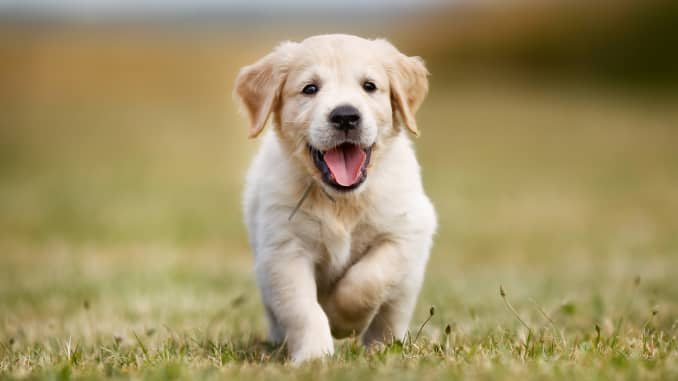

size 678 381


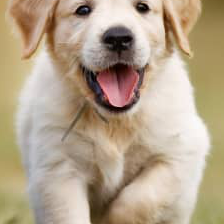

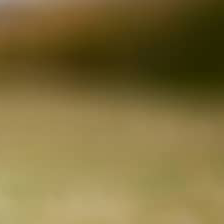

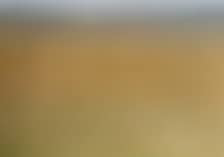

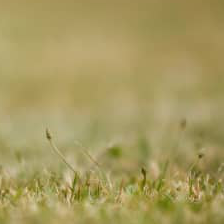

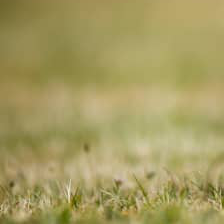

tensor([[-1.3658e+00, -8.9955e-01, -3.5581e+00, -3.8053e+00, -2.7329e+00,
         -2.1052e+00, -4.1860e+00,  1.5650e+00,  1.7712e+00,  2.2534e+00,
          5.2028e+00,  2.9628e+00,  2.6012e+00,  2.4602e+00,  2.4843e+00,
          4.2024e+00,  2.9918e+00,  2.3573e+00,  3.1135e+00,  2.3321e+00,
          3.4938e+00,  3.6503e+00,  1.6317e+00,  2.6768e+00,  1.8516e+00,
          1.8972e+00,  2.4025e+00,  1.6754e+00,  1.4962e+00,  6.9442e-01,
          6.6027e-01,  7.0046e-02,  1.3979e+00, -1.5064e+00, -9.4448e-02,
          1.3853e+00,  1.3533e+00, -4.5529e-01,  1.5932e+00,  6.3255e-01,
          1.3542e+00,  1.3188e+00,  3.6278e+00,  1.2307e+00,  1.2479e+00,
          4.2086e-01,  9.8787e-01,  2.0234e+00, -3.9469e-01,  7.2287e-01,
         -1.4308e+00, -3.1877e+00,  1.8623e+00,  1.6120e+00,  7.8071e-01,
          1.6699e-01, -6.8445e-02,  9.1150e-01,  3.4585e-02,  1.9172e+00,
          7.8099e-01, -6.1847e-01,  8.8710e-01,  3.2757e+00,  1.1668e+00,
         -9.9843e-01,  1.7046e+00,  4.

In [ ]:
# https://learnopencv.com/pytorch-for-beginners-image-classification-using-pre-trained-models/

import torch, torchvision
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf




# load model
resnet = torchvision.models.resnet101(pretrained=True)

# set network to evaluation mode
resnet.eval()

transform = torchvision.transforms.Compose([          
# torchvision.transforms.Resize(256),                   
# torchvision.transforms.CenterCrop(224),               
  torchvision.transforms.ToTensor(),                     
  torchvision.transforms.Normalize(    #normalize the image channels                  
  mean=[0.485, 0.456, 0.406],                            
  std=[0.229, 0.224, 0.225]                             
 )])



                                                   


img = Image.open("/content/gdrive/MyDrive/dog.jpg") # You can download an image of a dog from Internet or capture an image by yourself.
#img_t = transform(img)
#print(img_t.shape)

display(img)
width, height = img.size
print("size", width, height)
center =  torchvision.transforms.Compose([ torchvision.transforms.CenterCrop(224)])
center_crop = center(img)
topleft_crop = img.crop((0, 0, 224, height-224)) #left, upper, right, and lower pixel coordinate.
topright_crop = img.crop((width-224, 0 , width, 224))
bottomleft_crop = img.crop((0,height-224,224,height))
bottomright_crop = img.crop((width-224, height-224, width, height))

display(center_crop)
display(topright_crop)
display(topleft_crop)
display(bottomright_crop)
display(bottomleft_crop)



"""
batch_t = torch.unsqueeze(img_t, 0)

# perform inference
out = resnet(batch_t)

# print top-5 classes predicted by model
_, indices = torch.sort(out, descending=True)
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
for idx in indices[0][:5]:
  print('Label:', idx, '. Confidence Score:', percentage[idx].item(), '%')
"""
ls=[]
for crop in [center_crop,bottomleft_crop,bottomright_crop,topleft_crop,topright_crop]:
  crop = transform(crop)
  batch = torch.unsqueeze(crop,0)
  out = resnet(batch)
  ls.append(out).  #list of output tensors for each crop

#Average Prediction from 5 crops
sum = ls[0]+ls[1]+ls[2]+ls[3]+ls[4]
avg = 0.2*sum
print(avg)

#print top average classes predicted by model
_, indices = torch.sort(avg, descending=True)
percentage = torch.nn.functional.softmax(avg, dim=1)[0] * 100
for idx in indices[0][:5]:
  print('Label:', idx, '. Confidence Score:', percentage[idx].item(), '%')



4. Refer to https://gist.github.com/ageitgey/4e1342c10a71981d0b491e1b8227328b, to check if the predicted classes are meaningful.

5. Task

Modify the code above, to peform data augmentation for the testing sample (averaging the scores of 5 crops: center crop, upper left crop, lower left crop, lower right crop, upper right crop).

Pls briefly discuss the advantages and disadvantages of using testing data augmentation.

# Hint: use tensor slicing five times

Advantages of using testing data Augmentation:
Data augmentation provides multiple views of the same testing sample with the final prediction done on the average of all prediction scores. It increases variance in the test data set. It helps to ensure that the test set is as similar to the training set as possible. It reduces generalization error.
Data augmentation on the test data helps to ensure the size of the test images are the same as the training images, through methods like cropping and resizing. It helps to predict the average of several variants of an input sample.

Disadvantages of testing data augmentation:
Data augmentation at testing is computationally costly as the Neual network has to process more multiple images.
Data augmentation methods if done ineffecitvely, may add too much variance into a data sample, making a sample image look too different from input training samples. This would result in lower accraucy of predictions as the model may not be able to correctly classify a sample that was excessivly augmented to look too different from training images. 